In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines
import math
import sys

0.0
1.0
2.0
3.0
4.0
5.0
1.5
2.5
4.438202247191011


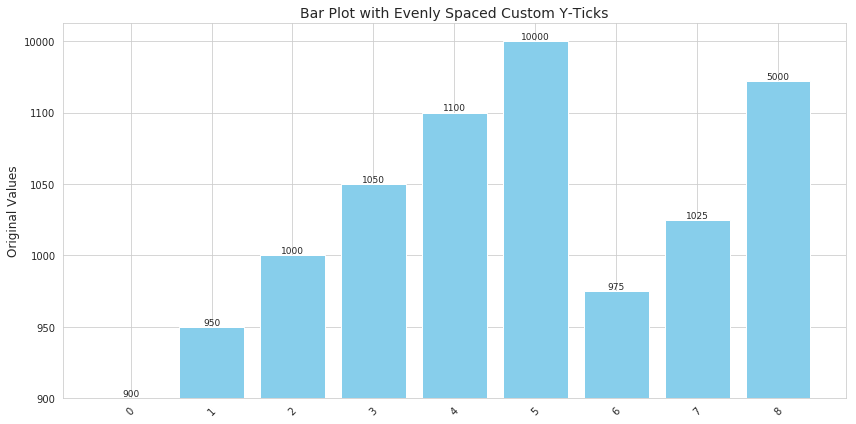

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Custom y-ticks and their desired positions (evenly spaced)
custom_ticks = [900, 950, 1000, 1050, 1100, 10000]
tick_positions = np.arange(len(custom_ticks))  # [0, 1, 2, 3, 4, 5]

# Sample data (original values)
values = [900, 950, 1000, 1050, 1100, 10000, 975, 1025, 5000]
categories = [str(i) for i in range(len(values))]

# Function to map values to evenly spaced positions
def value_to_position(value):
    print(np.interp(value, custom_ticks, tick_positions))
    return np.interp(value, custom_ticks, tick_positions)

# Transform the data
transformed_values = [value_to_position(v) for v in values]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(categories, transformed_values, color="skyblue")

# Configure y-axis
ax.set_yticks(tick_positions)
ax.set_yticklabels(custom_ticks)
ax.set_ylabel("Original Values", fontsize=12)
ax.set_title("Bar Plot with Evenly Spaced Custom Y-Ticks", fontsize=14)

# Add value labels on bars (optional)
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height,
        str(val), ha="center", va="bottom", fontsize=9
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
infile = "/mnt/fdkbio11/zhangj/support/UMI-nea_paper/benchmark_oN100_20250516/performance.csv"
df = pd.read_csv(infile,sep=",")
read_types = {12:"short_reads", 18:"short_reads", 25:"long_reads", 50:"long_reads"}
df["read_type"] = df["umi_len"].apply(lambda x: read_types[x])
df_cluster = df[["num_founder","read_type","tool","dedup_umi_cluster"]]
df_est = df.loc[df["tool"]=="UMI-nea", ["num_founder","read_type","tool","estimated_molecule"]]
df_est["tool"] = "UMI-nea_est_mol"
df_est["dedup_umi_cluster"] = df_est["estimated_molecule"]
df_est = df_est[["num_founder","read_type","tool","dedup_umi_cluster"]]
df_a = pd.concat([df_cluster, df_est], axis=0)
#df_a[(df_a["num_founder"]==1000) & (df_a["tool"]=="umi-tools")]

In [13]:
df_a_gp = df_a.groupby(["num_founder","read_type","tool"])["dedup_umi_cluster"].mean()
df_a_gp = df_a_gp.reset_index()
df_a_gp["dedup_umi_cluster"] = df_a_gp["dedup_umi_cluster"].astype(int)
df_a_gp = df_a_gp.sort_values(by=["num_founder","read_type","tool"])
fs=[1000, 10000]
bar_xcoord = [[-0.29,-0.08,0.11,0.31],[0.71,0.91,1.11,1.31]]
bar_ycoord = [[y for y in df_a_gp.loc[(df_a_gp["num_founder"]==1000) & (df_a_gp["read_type"]=="short_reads"),"dedup_umi_cluster"].tolist()],
             [y for y in df_a_gp.loc[(df_a_gp["num_founder"]==1000) & (df_a_gp["read_type"]=="long_reads"),"dedup_umi_cluster"].tolist()],
             [y for y in df_a_gp.loc[(df_a_gp["num_founder"]==10000) & (df_a_gp["read_type"]=="short_reads"),"dedup_umi_cluster"].tolist()],
             [y for y in df_a_gp.loc[(df_a_gp["num_founder"]==10000) & (df_a_gp["read_type"]=="long_reads"),"dedup_umi_cluster"].tolist()]]

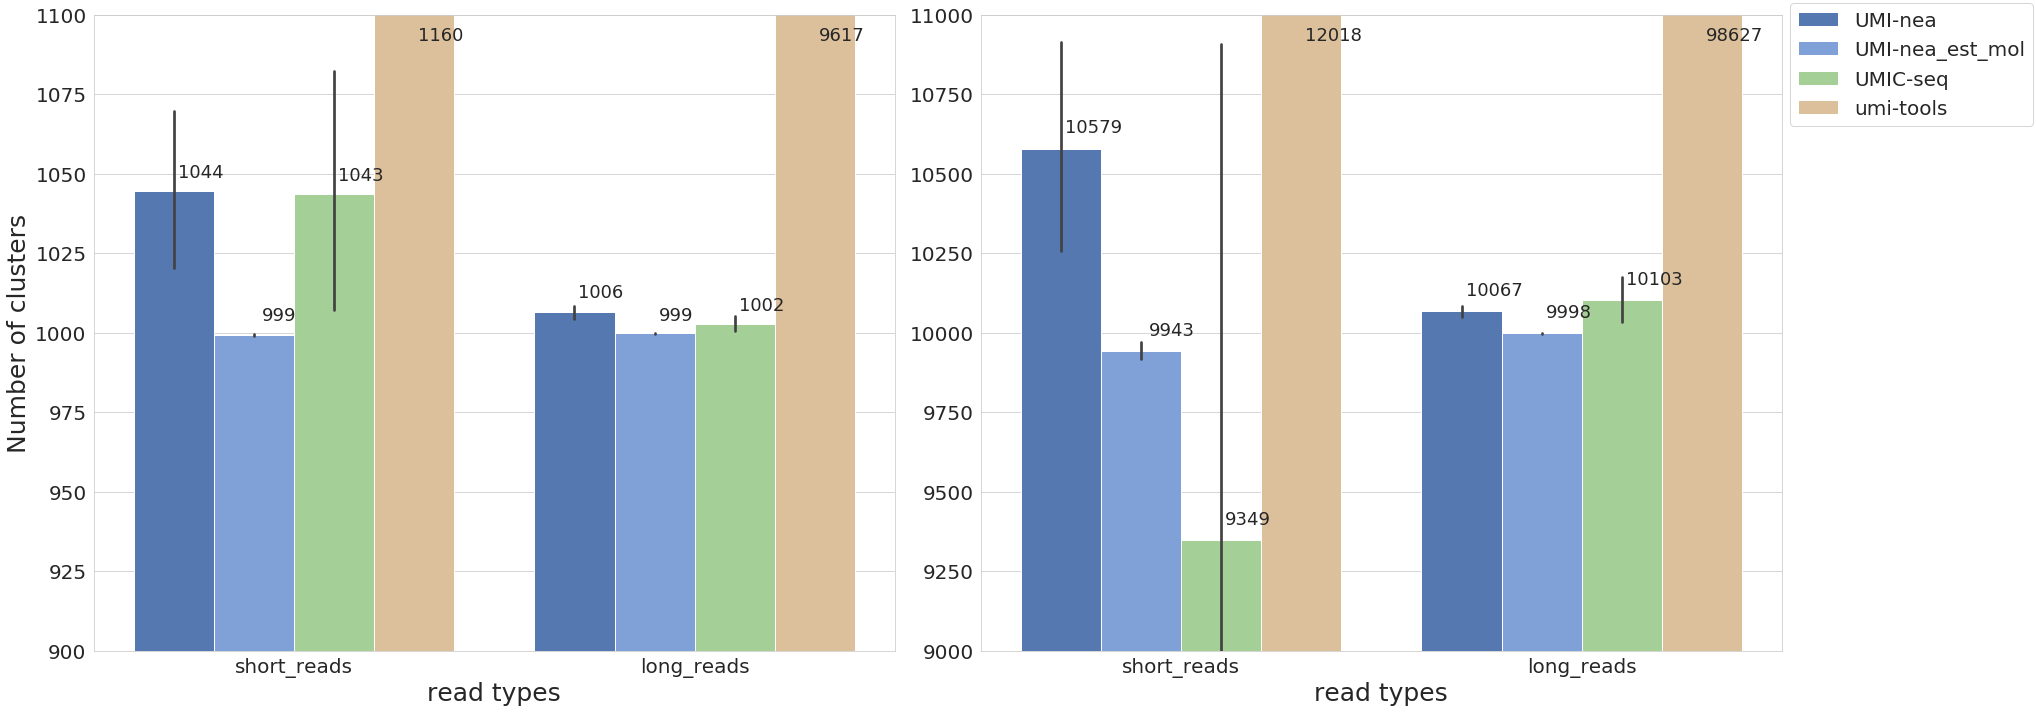

In [26]:
colors = sns.color_palette(["#4775BF", "#719DE5","#9FD88E","#E6C290"])

fig, axes = plt.subplots(1,2, figsize = (25,10), frameon=True)
sns.set_style('whitegrid')
for i in range(len(fs)):
    num_f = fs[i]
    df1 = df_a[df_a["num_founder"]==num_f]
    
    sns.barplot(ax=axes[i],data=df1, x="read_type", y="dedup_umi_cluster", 
                hue="tool", hue_order=["UMI-nea", "UMI-nea_est_mol", "UMIC-seq", "umi-tools"],
                ci=85, palette=colors)

    #yticks = [0]+[10**x for x in range(int(np.log10(num_f*10))+1)]
    for j in range(len(bar_xcoord)):
        for k in range(len(bar_xcoord[j])):
            x_loc = bar_xcoord[j][k]
            y_loc = min(bar_ycoord[i*2+j][k]+num_f*0.005,num_f+num_f*0.092)
            #y_loc = bar_ycoord[i*2+j][k]+num_f*0.005
            t = str(bar_ycoord[i*2+j][k])
            axes[i].text(x_loc, y_loc, t, fontsize=18)
    if i < len(fs)-1:
        lines, labels = axes[i].get_legend_handles_labels()
    if i > 0:
        axes[i].set_ylabel("")
    else:
        axes[i].set_ylabel("Number of clusters", fontsize=25)
    axes[i].get_legend().remove()
    axes[i].set(ylim=(num_f-num_f*0.1, num_f+num_f*0.1))
    #axes[i].set_yticklabels(yticks)
    axes[i].set_xlabel("read types",fontsize=25)
    axes[i].tick_params(axis='both', which='major', labelsize=20)
    
fig.tight_layout()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.135,1), fontsize=20)

In [209]:
infile = "/mnt/fdkbio11/zhangj/support/UMI-nea_paper/benchmark_oN100_20250516/performance.csv"
df = pd.read_csv(infile,sep=",")
read_types = {12:"short_reads", 18:"short_reads", 25:"long_reads", 50:"long_reads"}
df["read_type"] = df["umi_len"].apply(lambda x: read_types[x])
df_b = df[["num_founder","read_type","tool","V-measure"]]
df_b[(df_b["num_founder"]==10000) & (df_b["tool"]=="UMIC-seq")]

df_b_gp = df_b.groupby(["num_founder","read_type","tool"])["V-measure"].mean()
df_b_gp = df_b_gp.reset_index()
df_b_gp = df_b_gp.sort_values(by=["num_founder","read_type","tool"])
df_b_gp = df_b_gp.round(4)

In [210]:
bar_xcoord = [[-0.25,0.01,0.28],[0.74,1.01,1.28]]
bar_ycoord = [[y for y in df_b_gp.loc[(df_b_gp["num_founder"]==1000) & (df_b_gp["read_type"]=="short_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]==1000) & (df_b_gp["read_type"]=="long_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]==10000) & (df_b_gp["read_type"]=="short_reads"),"V-measure"].tolist()],
             [y for y in df_b_gp.loc[(df_b_gp["num_founder"]==10000) & (df_b_gp["read_type"]=="long_reads"),"V-measure"].tolist()]]

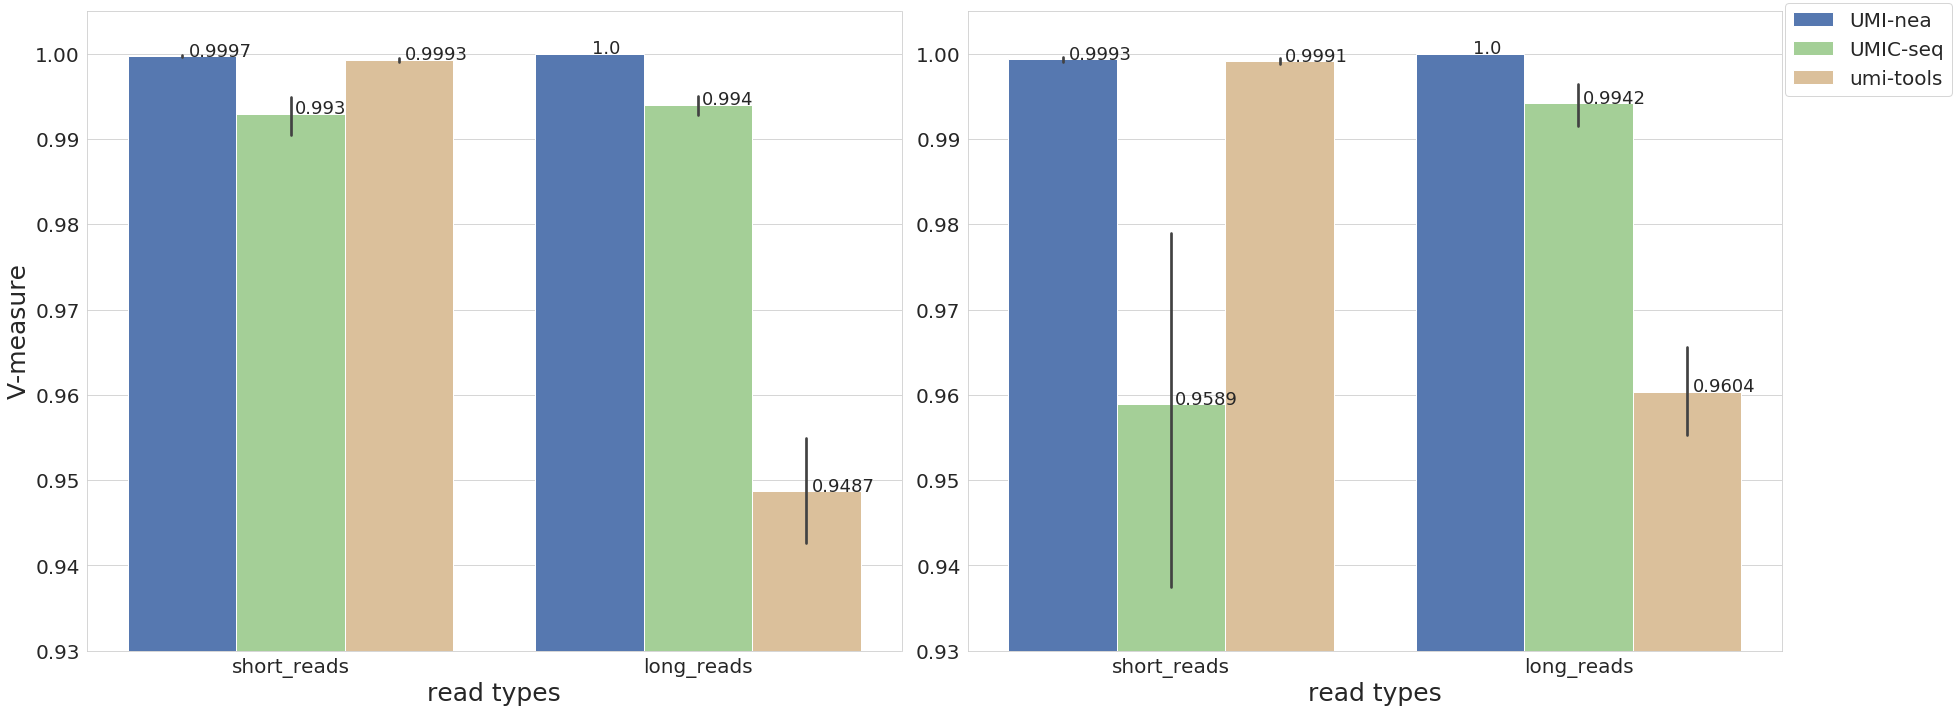

In [215]:
colors = sns.color_palette(["#4775BF","#9FD88E","#E6C290"])

fs=[1000, 10000]

fig, axes = plt.subplots(1,2, figsize = (25,10), frameon=True)
sns.set_style('whitegrid')
for i in range(len(fs)):
    num_f = fs[i]
    df1 = df_b[df_b["num_founder"]==num_f]
    sns.barplot(ax=axes[i],data=df1, x="read_type", y="V-measure", 
                hue="tool",hue_order=["UMI-nea", "UMIC-seq", "umi-tools"],
                ci=85, palette=colors)
    for j in range(len(bar_xcoord)):
        for k in range(len(bar_xcoord[j])):
            x_loc = bar_xcoord[j][k]
            y_loc = bar_ycoord[i*2+j][k]
            t = str(bar_ycoord[i*2+j][k])
            axes[i].text(x_loc, y_loc, t, fontsize=18)
    if i < len(fs)-1:
        lines, labels = axes[i].get_legend_handles_labels()
    if i > 0:
        axes[i].set_ylabel("")
    else:
        axes[i].set_ylabel("V-measure", fontsize=25)
    axes[i].get_legend().remove()
    axes[i].set(ylim=(0.93,1.005))
    axes[i].set_xlabel("read types",fontsize=25)
    axes[i].tick_params(axis='both', which='major', labelsize=20)
fig.tight_layout()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(1.09,1), fontsize=20)